In [1]:
# !pip install -q gdown
# !gdown --id 1AQjQZwOAkeBTSG_1I9fYn8KBcxBBbYyk

In [2]:
# import tarfile
# !mkdir train
# #simple function to extract the train data
# #tar_file : the path to the .tar file
# #path : the path where it will be extracted
# def extract(tar_file, path):
#     opened_tar = tarfile.open(tar_file)
     
#     if tarfile.is_tarfile(tar_file):
#         opened_tar.extractall(path)
#     else:
#         print("The tar file you entered is not a tar file")

# extract("/kaggle/working/driver_161_90frame.tar.gz", "/kaggle/working/train")

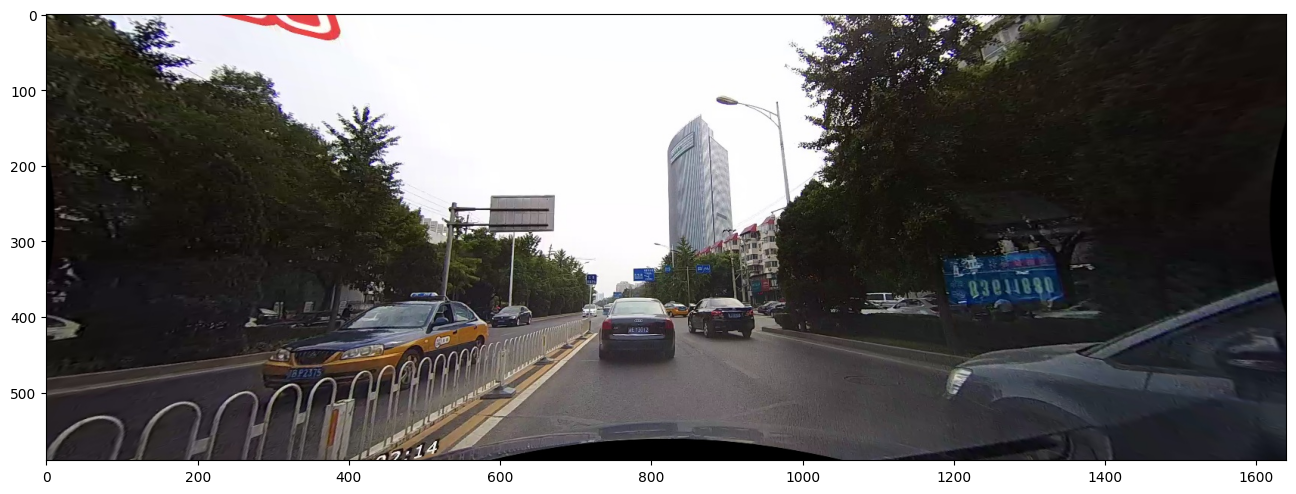

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt



#DIR = "../input/culane/driver_161_90frame/06030819_0755.MP4/"
DIR = "/media/vjekod/NewVolume/CuLane/driver_161_90frame/06031602_0863.MP4/"
img = plt.imread(DIR+"00000.jpg")
plt.figure(figsize=(16,18))
plt.imshow(img)
plt.imshow(img)

In [5]:
!cat "/media/vjekod/NewVolume/CuLane/driver_161_90frame/06031602_0863.MP4/00000.lines.txt"

531.485 590 542.218 580 553.659 570 565.863 560 577.305 550 589.509 540 600.714 530 612.918 520 624.36 510 636.564 500 648.005 490 660.209 480 671.767 470 683.971 460 695.412 450 706.854 440 719.058 430 
1130.23 590 1114.55 580 1096.26 570 1078.88 560 1061.46 550 1043.22 540 1025.8 530 1007.55 520 990.128 510 972.709 500 954.418 490 936.899 480 919.479 470 901.189 460 883.67 450 866.25 440 847.959 430 
1650.93 560 1600.74 550 1549.84 540 1499.82 530 1448.93 520 1398.03 510 1348 500 1297.97 490 1247.15 480 1196.14 470 1146.11 460 1095.29 450 1045.26 440 994.252 430 944.224 420 


In [6]:
exist_list = []
listfile = DIR + "00000.lines.txt"
with open(listfile) as f:
    for line in f:
        line = line.strip()
        l = line.split(" ")
        exist_list.append([int(eval(x)) for x in l[2:]])

In [6]:
# image = cv2.circle(img, (exist_list[0][0],exist_list[0][1]), radius=0, color=(0, 255, 0), thickness=20)
# plt.figure(figsize=(16,18))
# plt.imshow(image)

In [7]:
exist_list[0][0],exist_list[0][1]

(542, 580)

In [8]:
for j in range(0,exist_list.__len__()):
    for i in range(0,exist_list[j].__len__(),2):
        #image = cv2.circle(img, (exist_list[j][i],exist_list[j][i+1]), radius=0, color=(0, 255, 0), thickness=10)
        image = cv2.circle(img, (exist_list[j][i],exist_list[j][i+1]), radius=0, color=(0, 255, 0), thickness=10)
        img = image

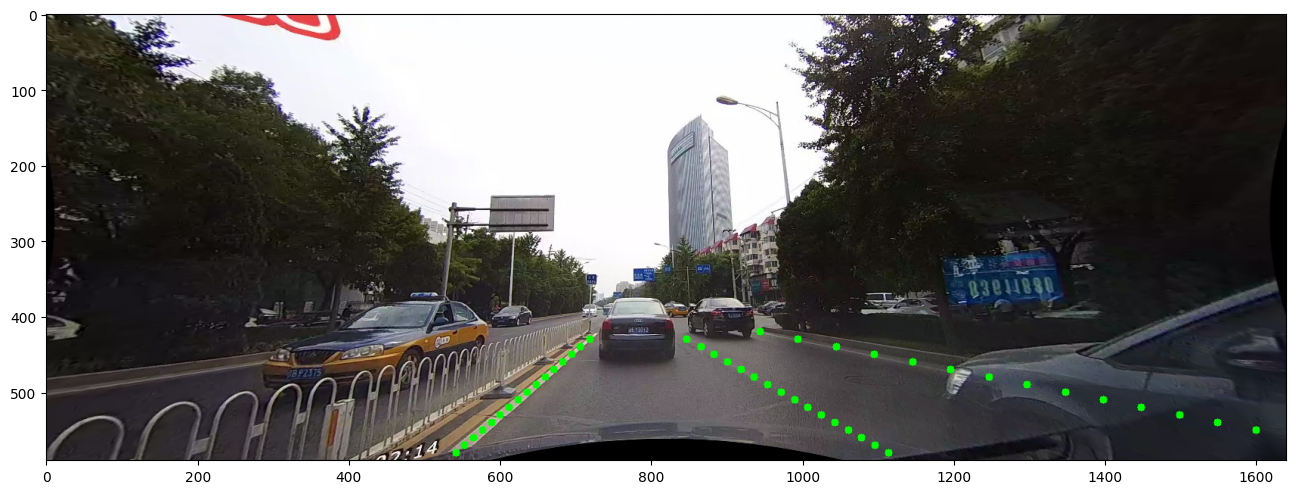

In [9]:
plt.figure(figsize=(16,18))
plt.imshow(image)

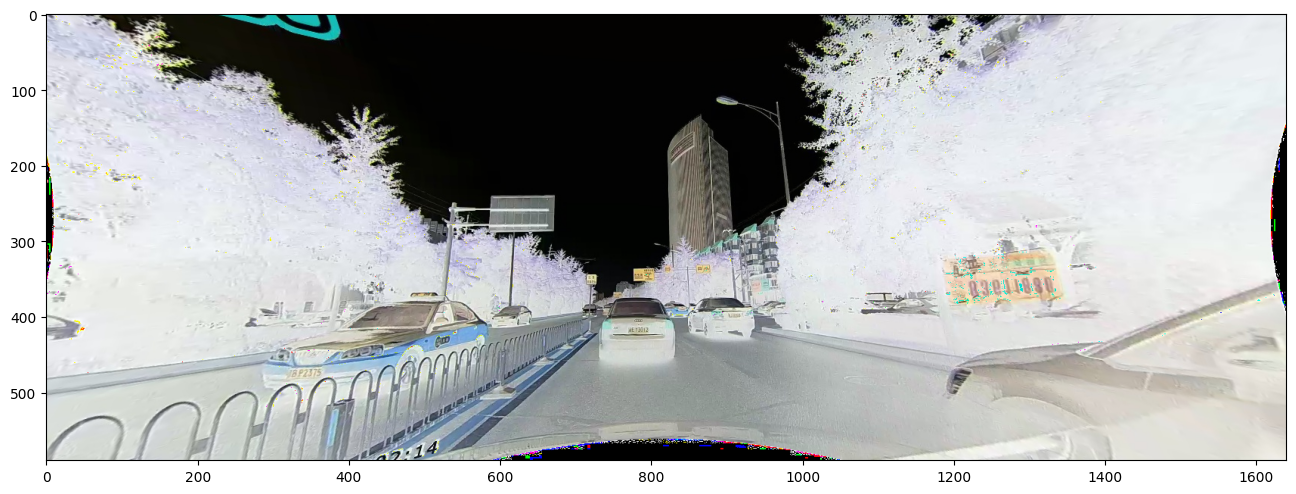

In [12]:
mask = plt.imread(DIR + "00000.jpg")
plt.figure(figsize=(16,18))
plt.imshow(mask*255);

In [13]:
np.unique(mask), np.unique(mask*255)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

(542, 580)

In [17]:
len(exist_list[0])

32

In [18]:
exist_list[0]

[542,
 580,
 553,
 570,
 565,
 560,
 577,
 550,
 589,
 540,
 600,
 530,
 612,
 520,
 624,
 510,
 636,
 500,
 648,
 490,
 660,
 480,
 671,
 470,
 683,
 460,
 695,
 450,
 706,
 440,
 719,
 430]

In [21]:
line_x = np.array(exist_list[0])[np.arange(0,len(exist_list[0]), 2)]
line_y = np.array(exist_list[0])[np.arange(1,len(exist_list[0]), 2)]

In [23]:
lines_x = [np.array(exist_list[i])[np.arange(0,len(exist_list[i]), 2)] for i in range(len(exist_list))]
lines_y = [np.array(exist_list[i])[np.arange(1,len(exist_list[i]), 2)] for i in range(len(exist_list))]

In [26]:
for j in range(0,exist_list.__len__()):
    for i in range(len(lines_x[j]) - 1):
        #image = cv2.circle(img, (exist_list[j][i],exist_list[j][i+1]), radius=0, color=(0, 255, 0), thickness=10)
        image = cv2.line(img, (lines_x[j][i],lines_y[j][i]), (lines_x[j][i+1],lines_y[j][i+1]), color=(0, 255, 255), thickness=10)
        img = image

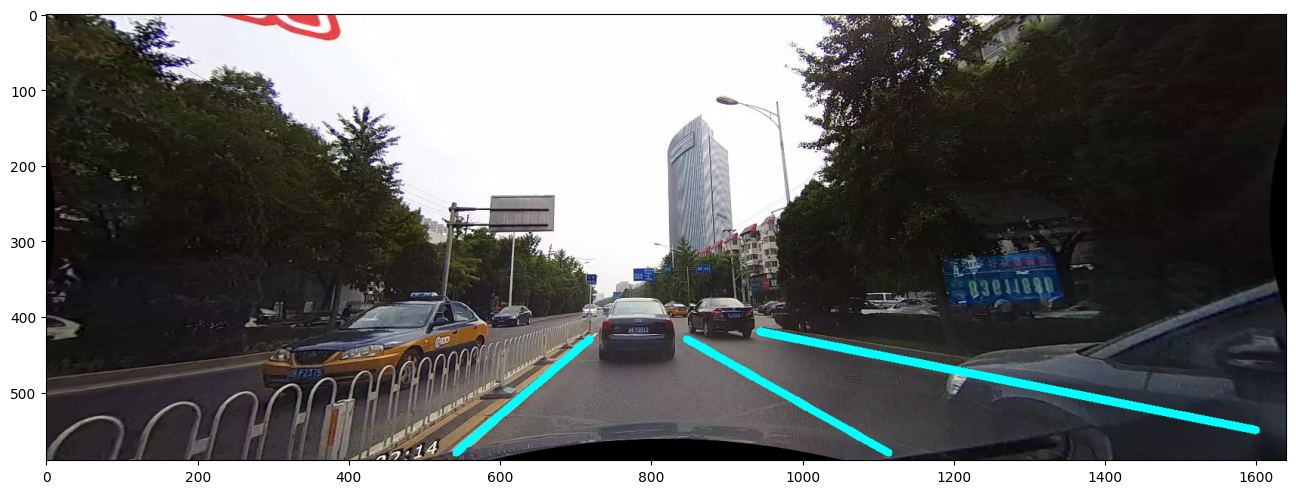

In [27]:
plt.figure(figsize=(16,18))
plt.imshow(image)